# Variational Methods for PDEs

<div class="alert alert-block alert-success">
$\newcommand{\R}{\mathbb{R}} \newcommand{\Z}{\mathbb{Z}} \newcommand{\N}{\mathbb{N}} 
\newcommand{\bff}{\mathbf{f}} \newcommand{\bx}{\mathbf{x}} 
\newcommand{\by}{\mathbf{y}} \newcommand{\bo}{\mathbb{1}} \newcommand{\bJ}{\mathbf{J}}$
The aim of this notebook is to consolidate the plots for the Variational Methods for PDEs notes.
</div>

<div class="alert alert-block alert-info">
The following packages are loaded into the environment. 
</div>

In [1]:
import numpy as np
from numpy import asarray, array, exp, arange, reciprocal, linspace, zeros, ones
from numpy.linalg import norm

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## User's Guide to Sobolev Spaces

<div class="alert alert-block alert-warning">
Mollifiers
</div>

In [2]:
def Mollifier(x):
    return exp(reciprocal(norm(x,2, axis = 0)**2 - 1))/0.443994

In [3]:
sup = linspace(-0.99,0.99,endpoint=True)

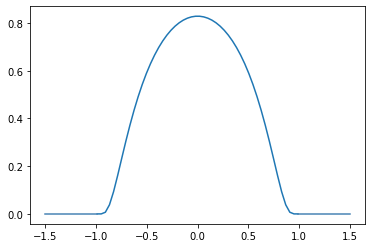

In [4]:
plt.plot(sup, Mollifier([sup]))
plt.plot([-1.5,-0.99],[0,0], color='steelblue')
plt.plot([0.99,1.5],[0,0], color='steelblue')
plt.show()

In [5]:
ε = linspace(0.25,1,5)[::-1]

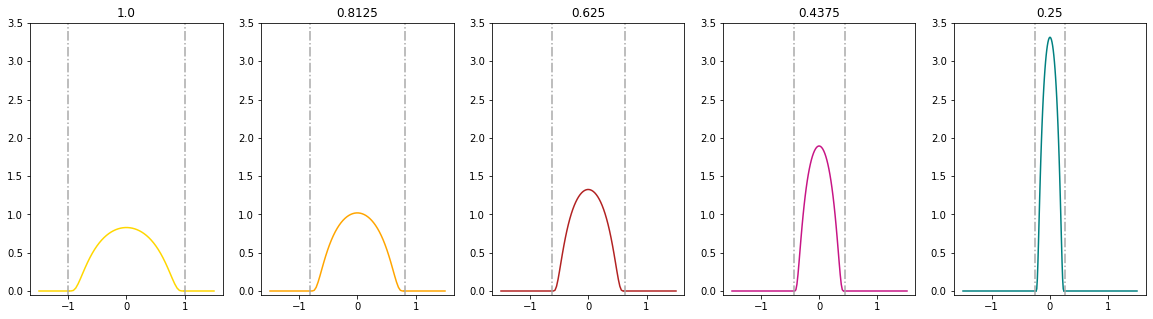

In [6]:
colors = ['gold', 'orange', 'firebrick','mediumvioletred', 'teal']
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i,j in enumerate(ε):
    ax[i].plot(sup * ε[i], ε[i]**-1 * Mollifier([sup]), color = colors[i])
    ax[i].plot([(sup[-1]* ε[i]),1.5],[0,0], color = colors[i])
    ax[i].plot([-1.5,(sup[0]* ε[i])],[0,0], color = colors[i])
    ax[i].set_title(j)
    ax[i].set_ylim([-0.05,3.5])
    ax[i].axvline(x= ε[i], linestyle='-.', color = 'darkgray')
    ax[i].axvline(x=-ε[i], linestyle='-.', color = 'darkgray')

plt.savefig('Fig-1_Moll.pdf', transparent = True, bbox_inches = 'tight')

<div class="alert alert-block alert-warning">
Extension operators
</div>

In [7]:
from scipy.interpolate import interp1d

In [8]:
x_1, x_2 = linspace(0,0.5),linspace(1,1.5)
y_1, y_2 = zeros(x_1.size), ones(x_2.size)
x_i = linspace(0.5,1)
y_i = interp1d(np.append(x_1, x_2), np.append(y_1, y_2), kind='cubic', copy=0)(x_i)

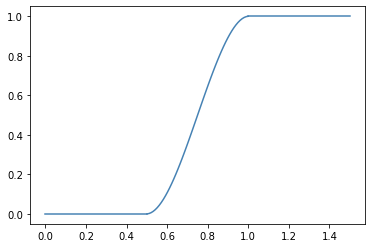

In [9]:
plt.plot(x_1,y_1, color='steelblue')
plt.plot(x_2,y_2, color='steelblue')
plt.plot(x_i,y_i, color='steelblue')
plt.show()

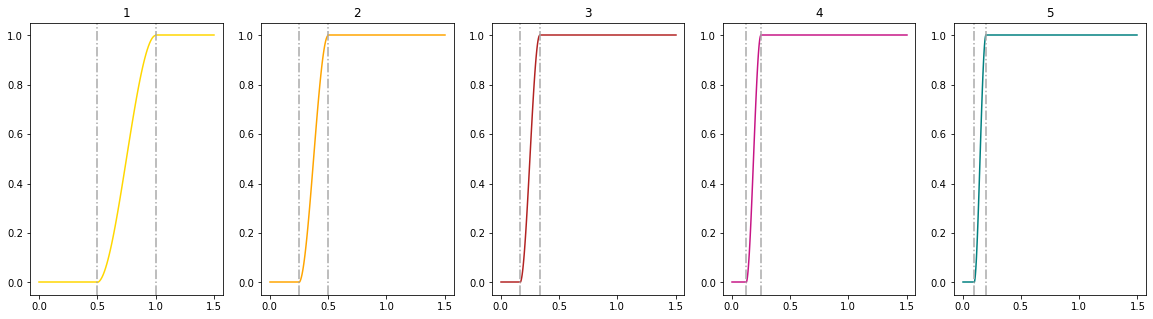

In [10]:
ε = [1,2,3,4,5]

colors = ['gold', 'orange', 'firebrick','mediumvioletred', 'teal']
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i,j in enumerate(ε):
    ax[i].plot(x_i / ε[i], y_i, color = colors[i])
    ax[i].plot(x_1 / ε[i], y_1, color = colors[i])
    ax[i].plot([x_2[0] / ε[i],1.5], [1,1], color = colors[i])
    ax[i].set_title(j)
    ax[i].axvline(x= 1/(2*j), linestyle='-.', color = 'darkgray')
    ax[i].axvline(x=  1/(j), linestyle='-.', color = 'darkgray')

plt.savefig('Fig-2_Ext.pdf', transparent = True, bbox_inches = 'tight')

## Young Measures

In [53]:
from scipy.signal import sawtooth
from numpy import pi as π

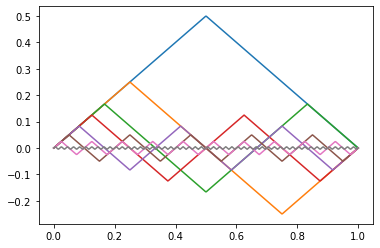

In [126]:
t = linspace(0, 1, 500)
plt.plot(t, 0.5*sawtooth(1 * π * linspace(0.5, 1.5, 500), 0.5))         # 1
plt.plot(t, (0.5/2)*sawtooth(2 * π * linspace(0.5/2, 1+0.5/2, 500), 0.5))# 2
plt.plot(t, (0.5/3)*sawtooth(3 * π * linspace(0.5/3, 1+0.5/3, 500), 0.5))# 3
plt.plot(t, (0.5/4)*sawtooth(4 * π * linspace(0.5/4, 1+0.5/4, 500), 0.5)) # 4
plt.plot(t, (0.5/6)*sawtooth(6 * π * linspace(0.5/6, 1+0.5/6, 500), 0.5)) # 6
plt.plot(t, (0.5/10)*sawtooth(10 * π * linspace(0.5/10, 1+0.5/10, 500), 0.5)) # 10
plt.plot(t, (0.5/20)*sawtooth(20 * π * linspace(0.5/20, 1+0.5/20, 500), 0.5)) # 20
plt.plot(t, (0.5/100)*sawtooth(100 * π * linspace(0.5/100, 1+0.5/100, 500), 0.5)) # 100

plt.savefig('Fig-6a.pdf', transparent = True, bbox_inches = 'tight')
plt.show()

In [125]:
np.gradient((0.5/10)*sawtooth(10 * π * linspace(0.5/10, 1+0.5/10, 500), 0.5), t, edge_order =2)

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.95, -0.05, -1.  ,
       -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
       -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
       -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
       -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
       -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
       -1.  , -1.  , -0.85,  0.15,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.75, -0.25,
       -1.  , -1.  ,

<div class="alert alert-block alert-warning">

</div>